In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/haoli/Downloads/df_36.csv')

/Users/haoli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_ob = df.select_dtypes(include = 'object')

In [4]:
df_fl = df.select_dtypes(include = 'float64')

In [5]:
ob_col = df_ob.columns.values
fl_col = df_fl.columns.values

In [6]:
ob_col[:5]

array(['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length'],
      dtype=object)

In [7]:
fl_col[:5]

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment'], dtype=object)

## Visualization of some object type features 

In [8]:
ob_col

array(['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint', 'hardship_flag',
       'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date'], dtype=object)

In [9]:
df['loan_status_num'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [10]:
df.loan_status.value_counts()

Fully Paid     239220
Charged Off     49618
Name: loan_status, dtype: int64

In [11]:
df['loan_status_num'].value_counts()

0    239220
1     49618
Name: loan_status_num, dtype: int64

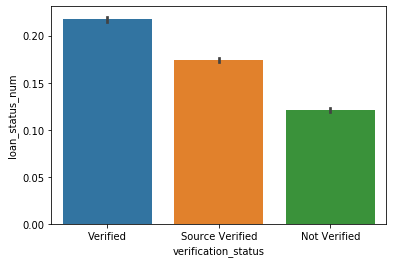

In [12]:
sns.barplot(x = 'verification_status', y = 'loan_status_num', data = df)

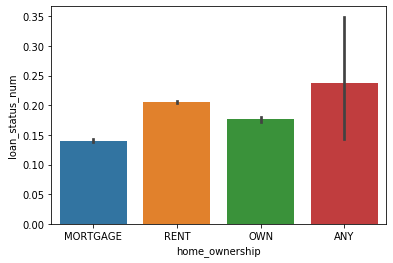

In [13]:
sns.barplot(x = 'home_ownership', y = 'loan_status_num', data = df)

In [14]:
df['pymnt_plan'].value_counts()

n    288838
Name: pymnt_plan, dtype: int64

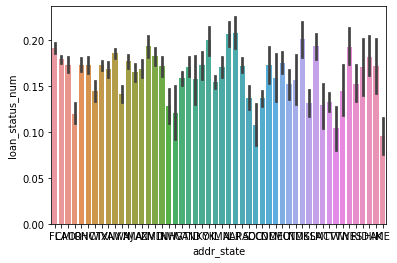

In [15]:
sns.barplot(x = 'addr_state', y = 'loan_status_num', data = df)

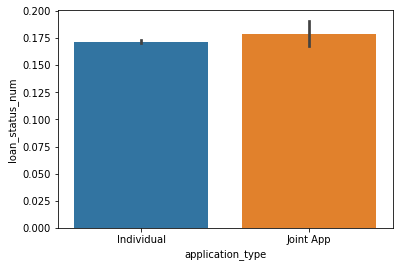

In [16]:
sns.barplot(x = 'application_type', y = 'loan_status_num', data = df)

In [17]:
df['revol_util'].value_counts()

0%        1366
57%        610
48%        595
51%        591
55%        589
          ... 
107.3%       1
109.6%       1
106.4%       1
139.9%       1
119.2%       1
Name: revol_util, Length: 1150, dtype: int64

In [18]:
# We shall draw a few more examples, but when one feature takes too many values, the bars are hard to see.
lst = [feat for feat in ob_col if len(df[feat].value_counts()) <= 50]

In [19]:
lst

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

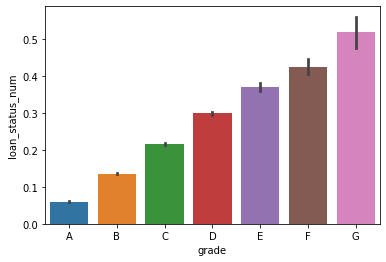

In [20]:
sns.barplot(x = 'grade', y = 'loan_status_num', data = df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

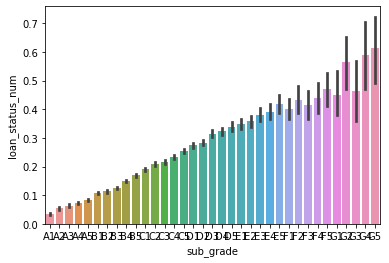

In [21]:
sns.barplot(x = 'sub_grade', y = 'loan_status_num', data = df, order = np.sort(df.sub_grade.unique()))

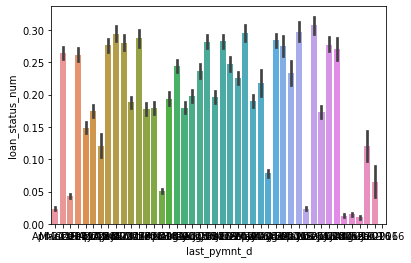

In [22]:
sns.barplot(x = 'last_pymnt_d', y = 'loan_status_num', data = df)

In [23]:
df['settlement_status'].value_counts()

COMPLETE    4302
ACTIVE      3160
BROKEN      1471
Name: settlement_status, dtype: int64

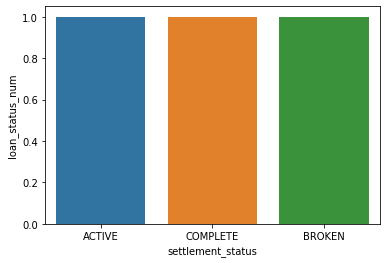

In [24]:
sns.barplot(x = 'settlement_status', y = 'loan_status_num', data = df)

In [25]:
df['hardship_flag'].value_counts()

N    288838
Name: hardship_flag, dtype: int64

In [26]:
df['hardship_type'].value_counts()

INTEREST ONLY-3 MONTHS DEFERRAL    2448
Name: hardship_type, dtype: int64

In [27]:
df['hardship_loan_status'].value_counts()

Late (16-30 days)     1108
Current                654
In Grace Period        609
Late (31-120 days)      77
Name: hardship_loan_status, dtype: int64

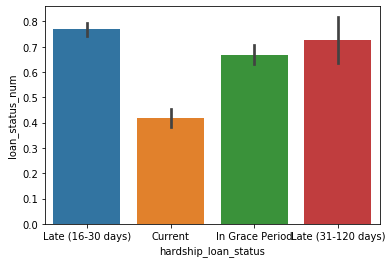

In [28]:
sns.barplot(x = 'hardship_loan_status', y = 'loan_status_num', data = df)

## Visualization of some float type features

In [29]:
fl_col

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',

In [30]:
#For a continuous feature, we break all of its values into five buckets according to 20%. 

In [31]:
def plot_continuous_bar(feat):
    factor = pd.qcut(df[feat], 5, labels = False)
    table = df.groupby([factor, 'loan_status']).size()
    table = table.unstack('loan_status')
    normedtable = table.div(table.sum(1), axis=0)
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax)
    ax.set_xlabel("%s percentile" % feat , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat)
    fig.savefig('age.jpg')

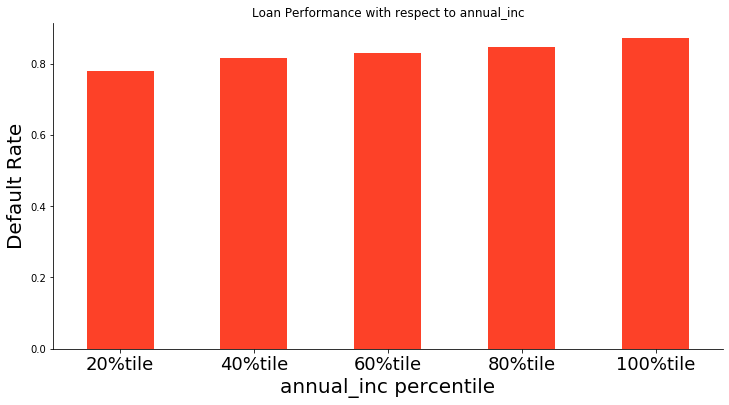

In [32]:
plot_continuous_bar('annual_inc')

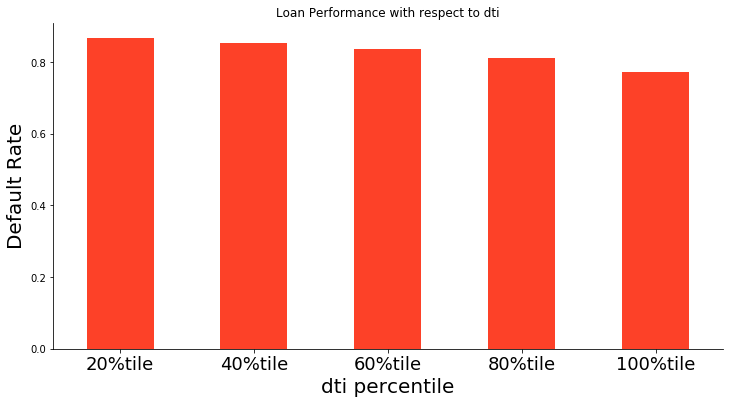

In [33]:
plot_continuous_bar('dti')

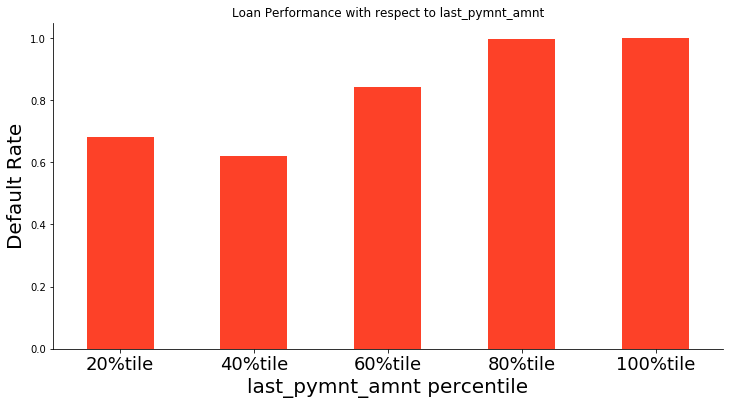

In [41]:
plot_continuous_bar('last_pymnt_amnt')